In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

## Data Exploration

In [109]:
df = pd.read_excel(r'C:\Users\Folio 1040 G3\Desktop\project\online+retail+ii\online_retail_II.xlsx', sheet_name=1)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.00,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.00,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.00,United Kingdom


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536642 entries, 0 to 536641
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      536642 non-null  object        
 1   StockCode    536642 non-null  object        
 2   Description  535188 non-null  object        
 3   Quantity     536642 non-null  int64         
 4   InvoiceDate  536642 non-null  datetime64[ns]
 5   Price        536642 non-null  float64       
 6   Customer ID  401605 non-null  float64       
 7   Country      536642 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.8+ MB


In [124]:
df.describe()

,Quantity,Price,Customer ID
count,536642.00,536642.00,401605.00
mean,9.62,4.63,15281.15
std,219.13,97.23,1714.01
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13939.00
50%,3.00,2.08,15145.00
75%,10.00,4.13,16784.00
max,80995.00,38970.00,18287.00


In [125]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,536642,536642,535188,536642
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2301,2357,490300


In [126]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
605,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1407,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1408,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1409,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1410,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1411,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1412,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1413,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1414,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1415,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [127]:
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.00,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
914,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.00,United Kingdom


In [128]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
...,...,...,...,...,...,...,...,...
535188,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
536280,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
536447,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
536448,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


In [129]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [130]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
297645,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
297646,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
297647,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [131]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK'],
      dtype=object)

### Notes

#### Stock Code
* StockCode is meant to follow the pattern `[0-9]{5}` but seems to have legit values for `[0-9]{5}[a-zA-Z]+`
    * Also contains other values:
        | **Code**            | **Description**                                                        | **Action**              |
        |---------------------|------------------------------------------------------------------------|-------------------------|
        | DCGS            | Looks valid, some quantities are negative though and customer ID is null | Exclude from clustering |
        | D               | Looks valid, represents discount values                                | Exclude from clustering |
        | DOT             | Looks valid, represents postage charges                                | Exclude from clustering |
        | M or m          | Looks valid, represents manual transactions                            | Exclude from clustering |
        | C2              | Carriage transaction - not sure what this means                        | Exclude from clustering |
        | BANK CHARGES or B | Bank charges                                                        | Exclude from clustering |
        | S               | Samples sent to customer                                               | Exclude from clustering |
        | gift__XXX       | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude |
        | PADS            | Looks like a legit stock code for padding                              | Include                 |
        | AMAZONFEE       | Looks like fees for Amazon shipping or something                       |  Exclude from clustering|
        | CRUX            | Commissions                                                            |  Exclude from clustering|

## Data Cleaning

In [132]:
cleaned_df = df.copy()

In [133]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
536640,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France


In [145]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [146]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

In [147]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,391153.00,391153.00,391153.00
mean,13.15,2.87,15295.17
std,180.81,4.28,1710.33
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16794.00
max,80995.00,649.50,18287.00


need to drop transactions with price = 0

In [148]:
len(cleaned_df[cleaned_df["Price"] == 0])

0

In [149]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0.0]

In [150]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,391153.00,391153.00,391153.00
mean,13.15,2.87,15295.17
std,180.81,4.28,1710.33
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16794.00
max,80995.00,649.50,18287.00


min price still shows 0.00 

In [151]:
cleaned_df["Price"].min()

0.001

In [152]:
(len(df)-len(cleaned_df))/len(df)

0.27110997648339114

27.1% data has been cleaned from the original dataset during cleaning

## Feature Engineering

In [153]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France,10.20
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France,12.60
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60


In [154]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("SalesLineTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,77183.60,1,2011-01-18 10:01:00
1,12347.00,4310.00,7,2011-12-07 15:52:00
2,12348.00,1437.24,4,2011-09-25 13:13:00
3,12349.00,1457.55,1,2011-11-21 09:51:00
4,12350.00,294.40,1,2011-02-02 16:01:00


since dataset is for 2010-2011, most recent date from dataset was used as current date to calculate Recency

In [155]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,77183.60,1,2011-01-18 10:01:00,325
1,12347.00,4310.00,7,2011-12-07 15:52:00,1
2,12348.00,1437.24,4,2011-09-25 13:13:00,74
3,12349.00,1457.55,1,2011-11-21 09:51:00,18
4,12350.00,294.40,1,2011-02-02 16:01:00,309


In [156]:
aggregated_df.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,4334.00,4334.00,4334.00,4334.00
mean,15299.25,2015.97,4.25,91.70
std,1721.99,8903.67,7.63,100.18
min,12346.00,3.75,1.00,0.00
25%,13812.25,304.24,1.00,17.00
50%,15297.50,662.57,2.00,50.00
75%,16778.75,1631.62,5.00,142.00
max,18287.00,279138.02,206.00,373.00


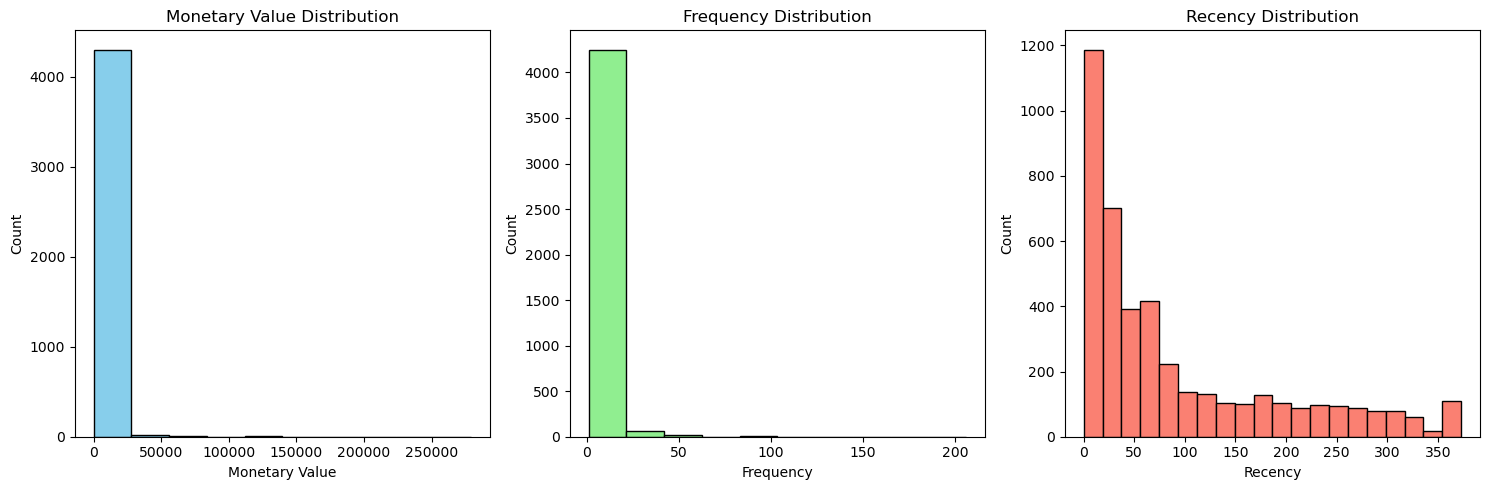

In [157]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Monetary value and frequency have outliers and recency has a right-skewed (also called positively skewed) distribution.

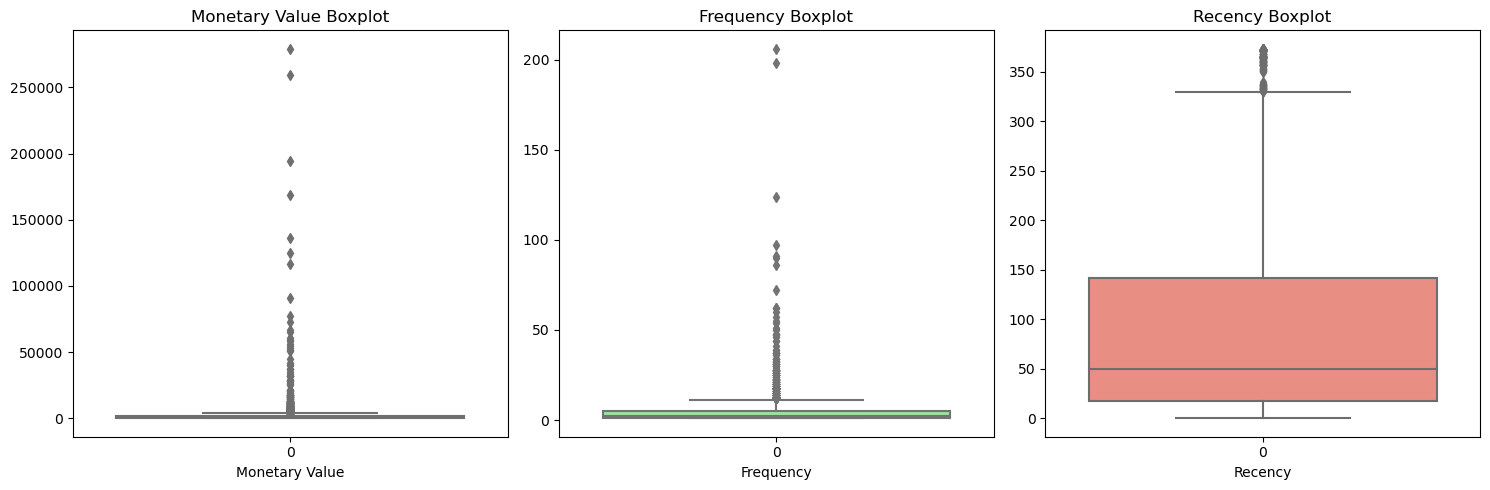

In [158]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [160]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,421.00,421.00,421.00,421.00
mean,15020.89,12634.95,16.71,24.80
std,1791.69,26200.27,19.14,47.27
min,12346.00,3627.77,1.00,0.00
25%,13324.00,4395.65,8.00,3.00
50%,14961.00,5870.08,12.00,10.00
75%,16626.00,9585.91,19.00,23.00
max,18251.00,279138.02,206.00,371.00


In [162]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,278.00,278.00,278.00,278.00
mean,15355.67,14467.37,23.09,13.17
std,1745.00,30133.64,21.17,30.37
min,12395.00,1296.44,12.00,0.00
25%,13880.25,4197.77,13.00,2.00
50%,15290.50,6267.41,17.00,5.50
75%,16781.25,11023.89,25.00,15.00
max,18283.00,279138.02,206.00,371.00


In [163]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,3866.00,3866.00,3866.00,3866.00
mean,15324.36,851.93,2.76,99.88
std,1710.15,795.37,2.17,101.85
min,12348.00,3.75,1.00,0.00
25%,13850.25,276.61,1.00,21.00
50%,15333.50,565.92,2.00,58.00
75%,16799.00,1178.29,4.00,159.75
max,18287.00,3619.17,11.00,373.00


In [164]:
print(non_outliers_df.columns)


Index(['Customer ID', 'MonetaryValue', 'Frequency', 'LastInvoiceDate',
       'Recency'],
      dtype='object')


In [167]:
non_outliers_df.reset_index(drop=True, inplace=True)


In [168]:
non_outliers_df.columns = non_outliers_df.columns.str.strip()


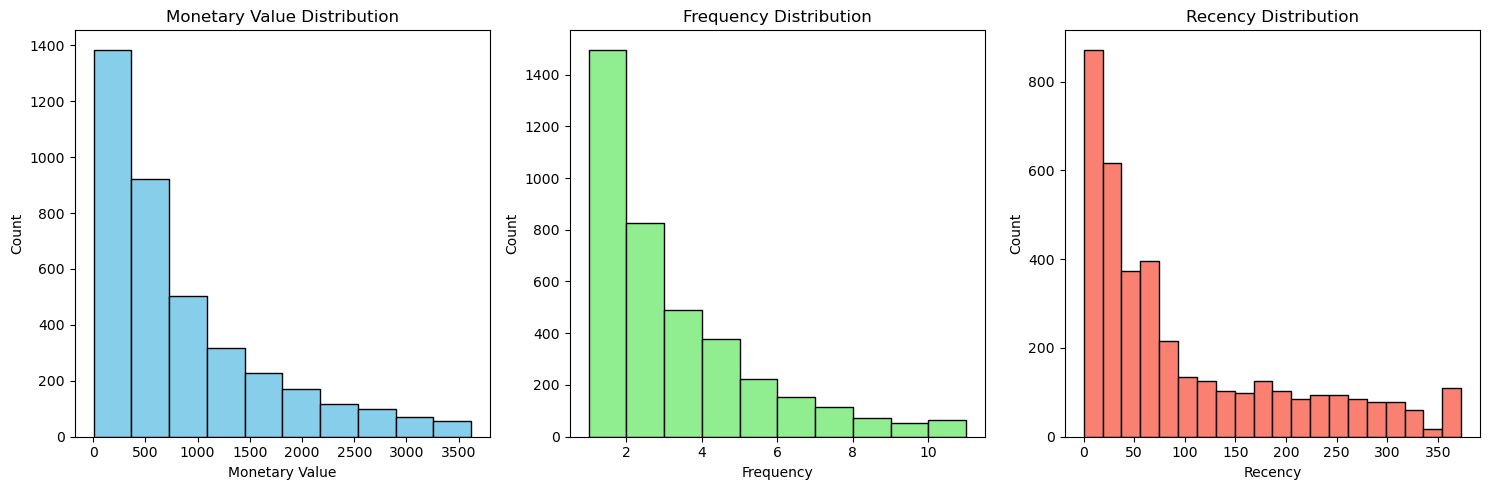

In [212]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(non_outliers_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(non_outliers_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(non_outliers_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

These distributions are typical in RFM (Recency, Frequency, Monetary) analysis, where customer behaviors are often right-skewed because a small portion of customers contribute to the majority of revenue, while most customers engage less frequently.

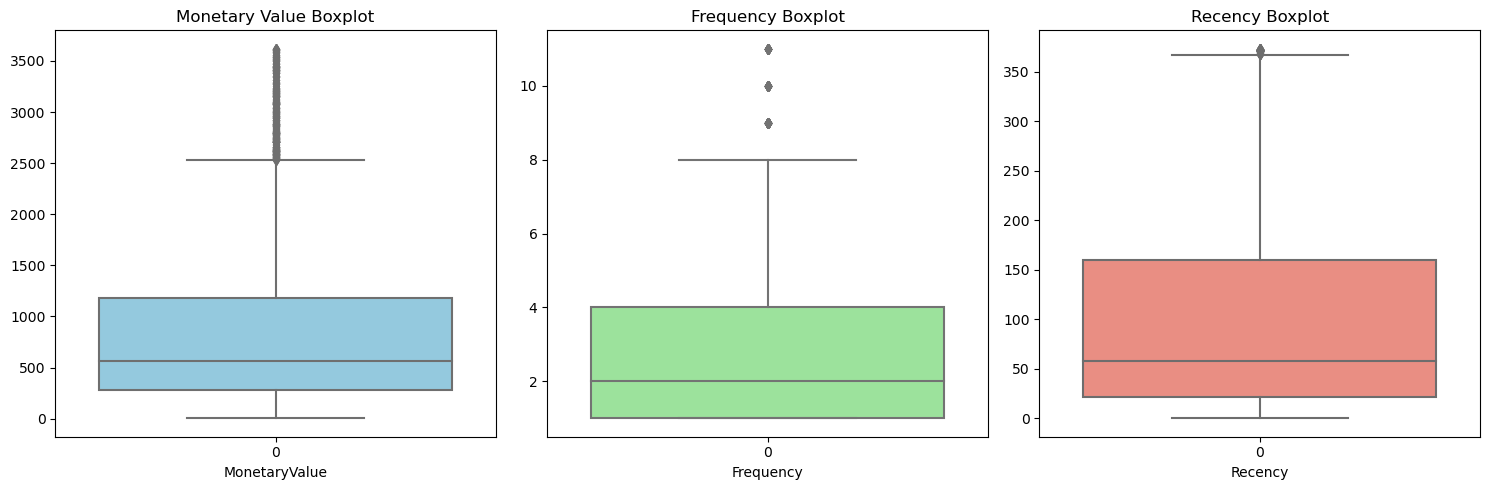

In [170]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('MonetaryValue')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

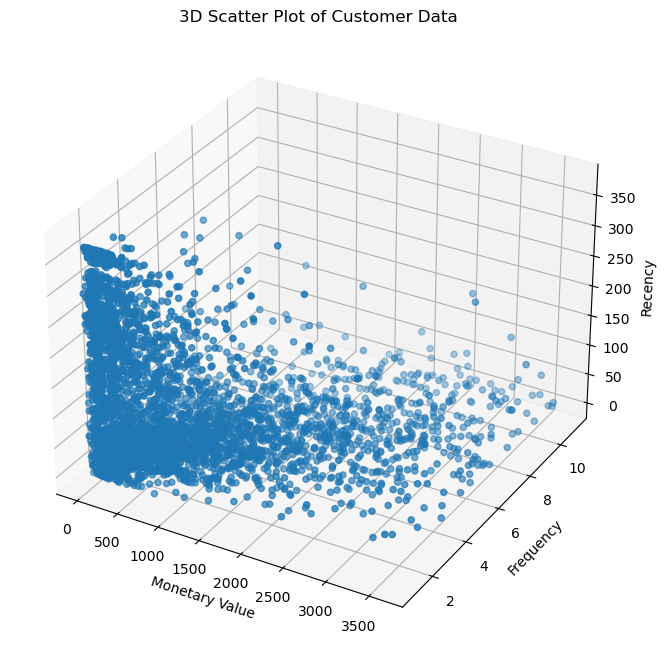

In [171]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

Standard scaling transforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $z$ is the standardized value,
- $x$ is the original value,
- $\mu$ is the mean of the feature,
- $\sigma$ is the standard deviation of the feature.

In [172]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[ 0.73600195,  0.57119213, -0.25414941],
       [ 0.76154068, -0.80952615, -0.80403728],
       [-0.70105761, -0.80952615,  2.05341576],
       ...,
       [-0.96962293, -0.80952615,  0.78670977],
       [-0.84736145, -0.34928672, -0.91205096],
       [ 1.23903064,  0.1109527 , -0.56837105]])

In [173]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,0.74,0.57,-0.25
1,0.76,-0.81,-0.80
2,-0.70,-0.81,2.05
3,0.67,1.95,-0.64
4,-0.96,-0.81,1.01
...,...,...,...
3861,-0.85,-0.81,-0.26
3862,-0.84,-0.81,1.74
3863,-0.97,-0.81,0.79
3864,-0.85,-0.35,-0.91


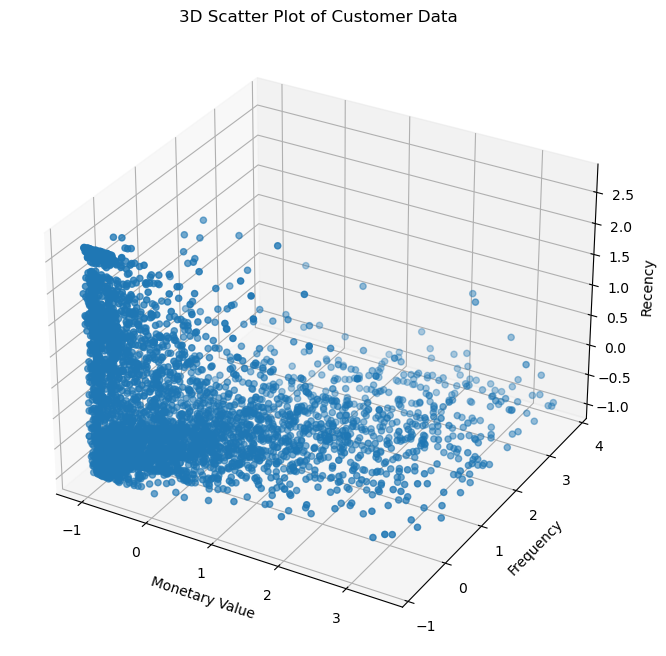

In [174]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

## KMeans Clustering

### Elbow Method 

The Elbow Method is a heuristic used to determine the optimal number of clusters ($K$) in a K-Means clustering algorithm. The method involves running the K-Means algorithm on the dataset for a range of values of $K$ (e.g., $K=1$ to $K=10$) and calculating the within-cluster sum of squares (WCSS) for each $K$:


$$
WCSS = \sum_{i=1}^{K} \sum_{x \in C_i} || x - \mu_i ||^2
$$

Where:
- $K$ is the number of clusters,
- $C_i$ is the set of points assigned to cluster $i$,
- $\mu_i$ is the centroid of cluster $i$,
- $x$ represents each data point in cluster $C_i$.

As $K$ increases, the WCSS tends to decrease because clusters become smaller and tighter. The Elbow Method identifies the value of $K$ where the reduction in WCSS starts to diminish, forming an "elbow" shape in the plot of WCSS vs. $K$. The point where the elbow occurs is considered the optimal number of clusters, as adding more clusters beyond this point provides little improvement in explaining the variance.

### Silhouette Score

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $s(i)$ is the silhouette score for a single sample $i$
- $a(i)$ is the average distance between $i$ and all other points in the same cluster,
- $b(i)$ is the minimum average distance between $i$ and all points in the nearest cluster to which $i$ does not belong.

The silhoutte score ranges between $[-1, 1]$, a higher value indicates more distinct clusters.

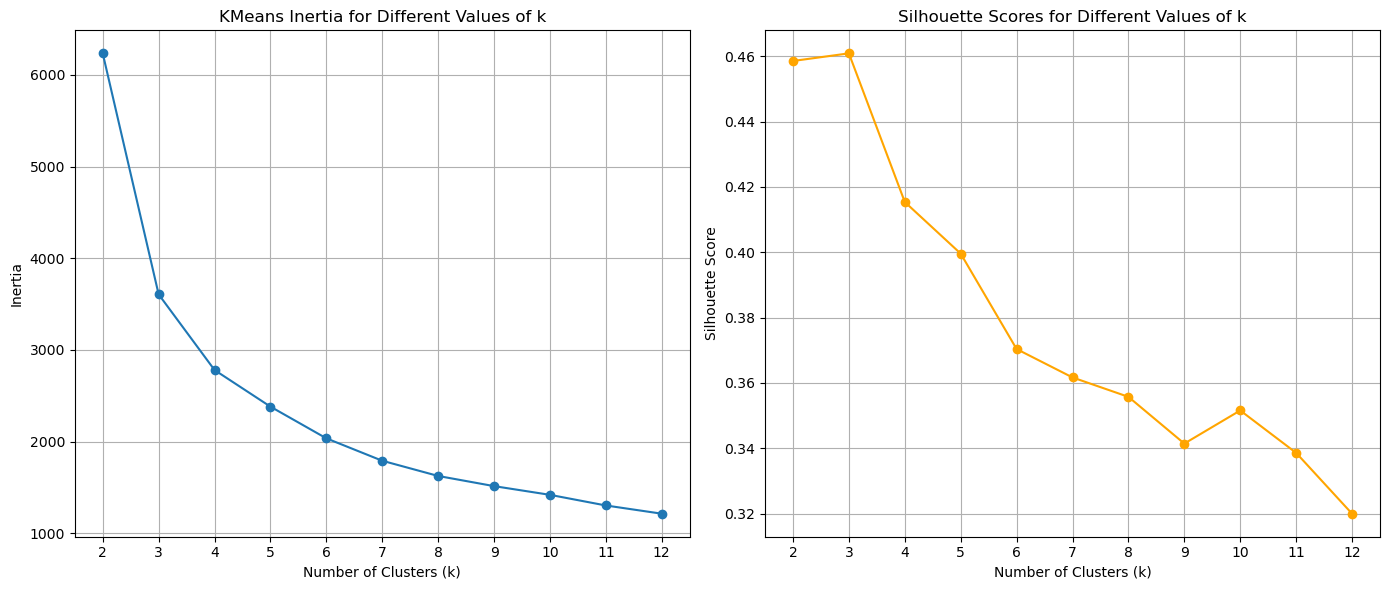

In [175]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

elbow point is around 4 and 5, so silhouette score is used to get the best value. 4 clusters will be used since it has a better silhouette score

In [176]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([0, 1, 3, ..., 3, 1, 0])

In [177]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

C:\Users\Folio 1040 G3\AppData\Local\Temp\ipykernel_19424\3577770544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12348.00,1437.24,4,2011-09-25 13:13:00,74,0
1,12349.00,1457.55,1,2011-11-21 09:51:00,18,1
2,12350.00,294.40,1,2011-02-02 16:01:00,309,3
3,12352.00,1385.74,7,2011-11-03 14:37:00,35,2
4,12353.00,89.00,1,2011-05-19 17:47:00,203,3
...,...,...,...,...,...,...
3861,18278.00,173.90,1,2011-09-27 11:58:00,73,1
3862,18280.00,180.60,1,2011-03-07 09:52:00,277,3
3863,18281.00,80.82,1,2011-06-12 10:53:00,180,3
3864,18282.00,178.05,2,2011-12-02 11:43:00,7,1


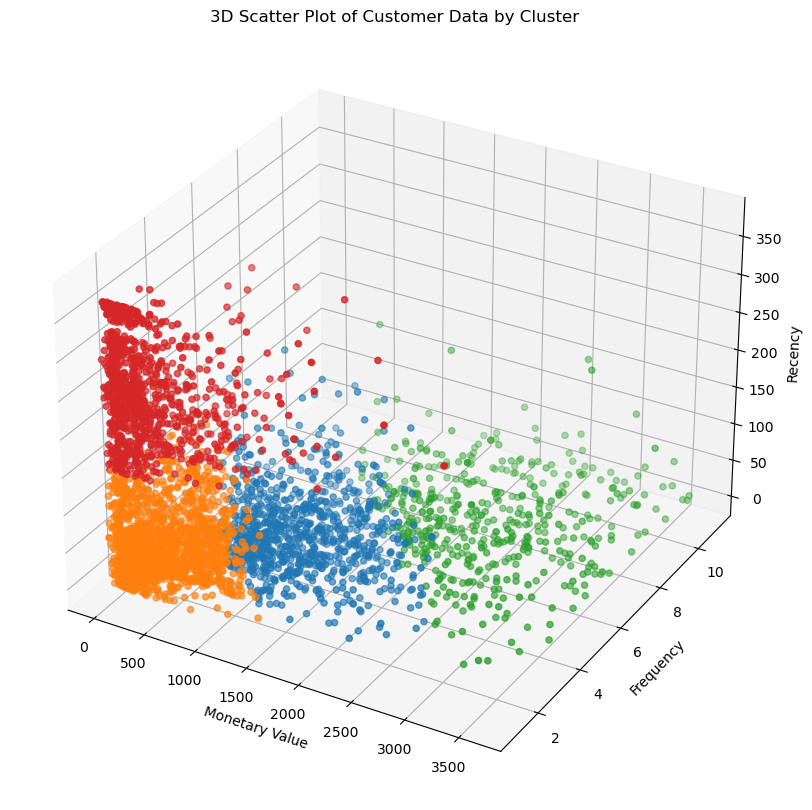

In [178]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

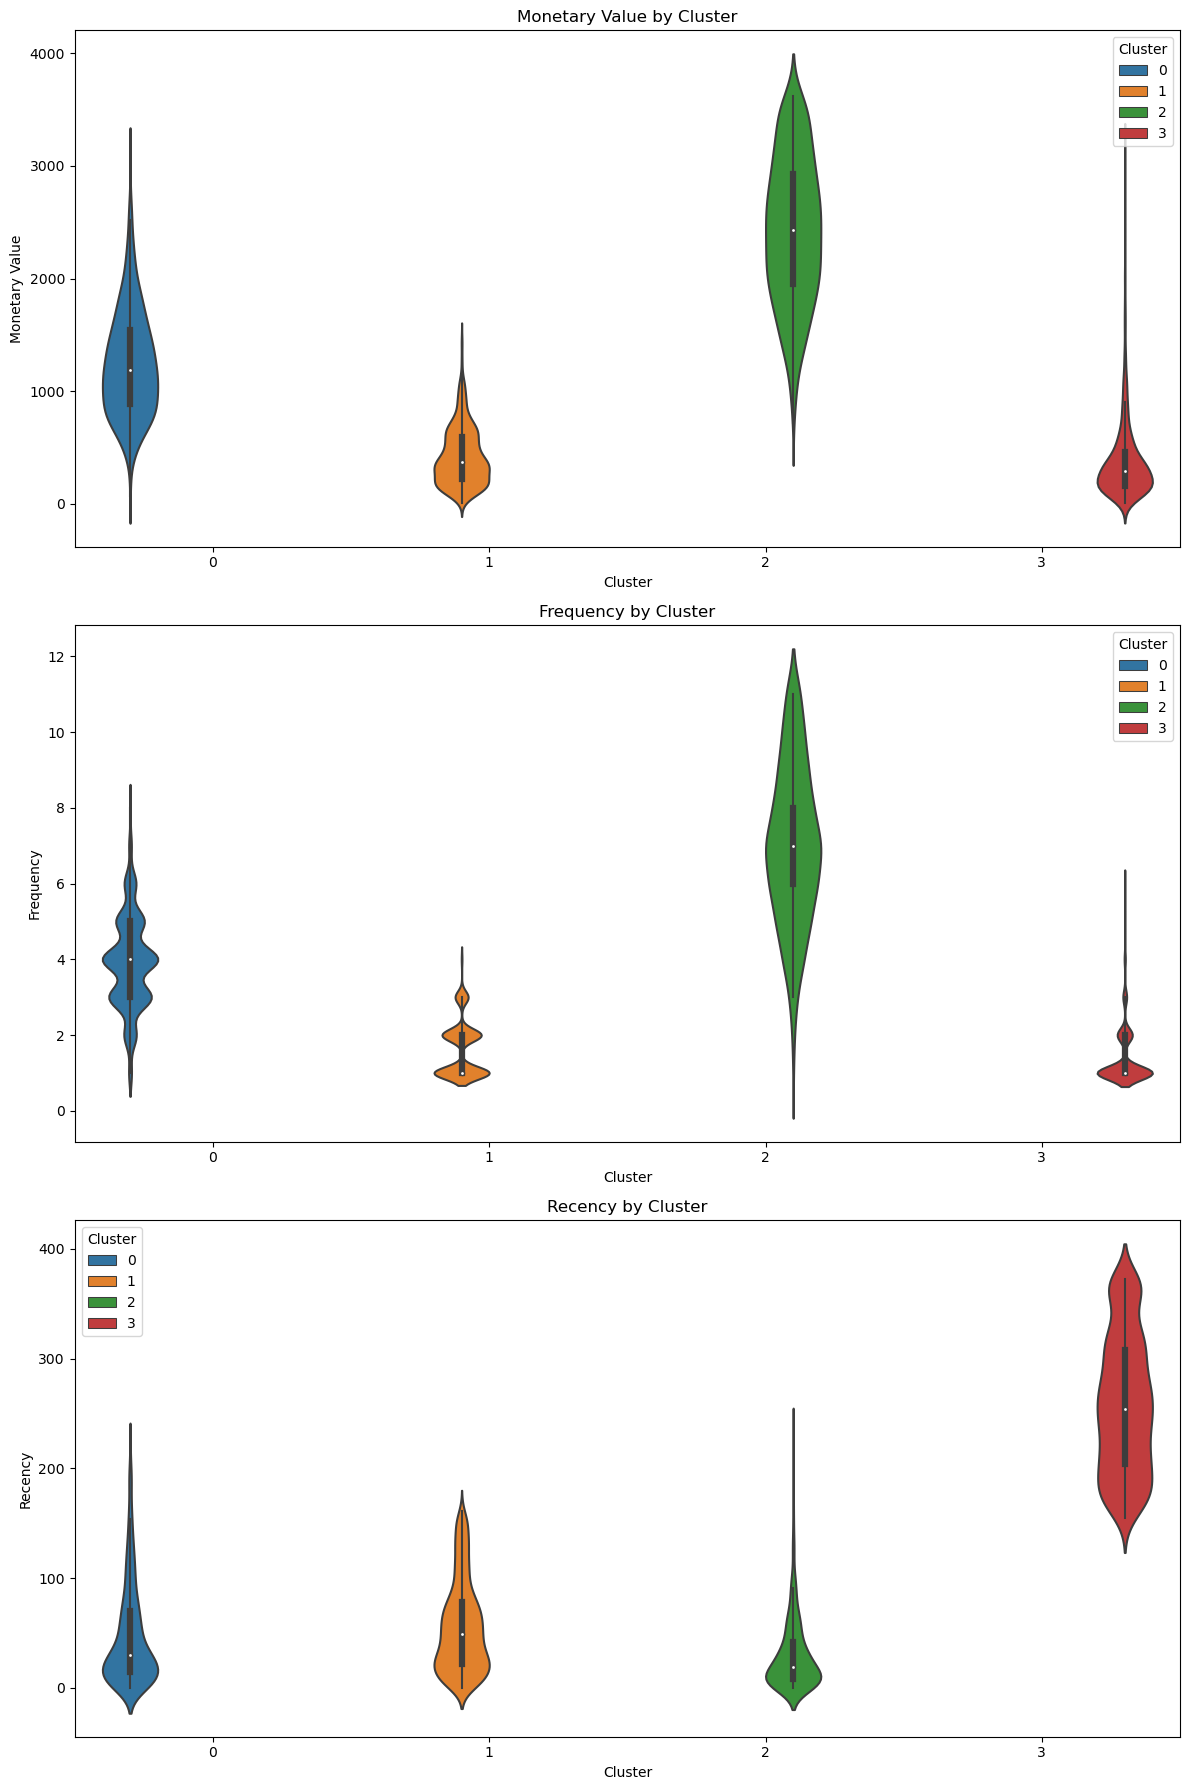

In [179]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


### 1. Cluster 0: **Actives**
*Rationale: This cluster represents average spend customers who purchase relatively regularly, though most are recent buyers.*

#### Marketing Strategies:
1. Keep them engaged with frequent, personalized offers tied to their purchasing behavior.
2. Introduce a reward system based on regular purchases to boost retention.
3. Send product recommendations or new arrivals based on their recent shopping trends.

---

### 2. Cluster 1: **Browsers**
*Rationale: This group includes lower-value, infrequent buyers who have averagely purchased recently.*

#### Marketing Strategies:
1. Offer time-sensitive discounts or promotions to encourage quick purchases.
2. Use remarketing campaigns or personalized follow-up emails to convert their interest into action.
3. Send educational content or product guides to help them discover more valuable products.

---

### 3. Cluster 2: **Champions**
*Rationale: This cluster represents high frequent and high-value customers, and most have made recent purchases.*

#### Marketing Strategies:
1. Provide exclusive offers, sneak peeks, or VIP treatment to reward loyalty and high value.
2. Set up an ambassador or referral program to leverage their advocacy.
3. Offer personalized thank-you notes or surprise gifts to deepen their connection with the brand.

---

### 4. Cluster 3: **Inactives**
*Rationale: This cluster includes low-value, few frequent buyers, many of whom are not actively purchasing.*

#### Marketing Strategies:
1. Run reactivation campaigns with deep discounts or personalized incentives to re-engage them.
2. Use surveys to understand why they’ve gone dormant and adjust messaging accordingly.
3. Send win-back emails highlighting popular items or trends to spark interest.


In [191]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

outlier_df = pd.concat([monetary_outliers_df, frequency_only_outliers])


outlier_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,77183.60,1,2011-01-18 10:01:00,325
1,12347.00,4310.00,7,2011-12-07 15:52:00,1
10,12357.00,6207.67,1,2011-11-06 16:07:00,32
12,12359.00,6310.03,4,2011-10-13 12:47:00,57
15,12362.00,4737.23,10,2011-12-06 15:40:00,2
...,...,...,...,...,...
4101,17965.00,2599.19,14,2011-11-02 09:31:00,37
4168,18065.00,2392.83,14,2011-12-04 10:30:00,5
4227,18144.00,2888.75,12,2011-12-02 12:46:00,7
4303,18241.00,2073.09,17,2011-11-30 12:10:00,9


In [192]:
outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,468.00,468.00,468.00,468.00
mean,15091.85,11631.81,16.53,24.14
std,1805.47,25028.62,18.23,46.12
min,12346.00,1296.44,1.00,0.00
25%,13415.50,4072.64,8.00,3.00
50%,15041.50,5499.21,13.00,9.00
75%,16679.50,8808.07,19.00,23.00
max,18283.00,279138.02,206.00,371.00


In [193]:
scaler = StandardScaler()

outlier_scaled_data = scaler.fit_transform(outlier_df[["MonetaryValue", "Frequency", "Recency"]])

outlier_scaled_data

array([[ 2.6218764 , -0.85289525,  6.53003169],
       [-0.29285044, -0.52337821, -0.50216743],
       [-0.2169493 , -0.85289525,  0.17066643],
       ...,
       [-0.34969621, -0.24878067, -0.37194152],
       [-0.38232018,  0.02581686, -0.32853289],
       [-0.38366048, -0.02910264, -0.4587588 ]])

In [183]:
Outlier_scaled_data_df = pd.DataFrame(outlier_scaled_data, index=outlier_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

Outlier_scaled_data_df

,MonetaryValue,Frequency,Recency
0,2.62,-0.85,6.53
1,-0.29,-0.52,-0.50
10,-0.22,-0.85,0.17
12,-0.21,-0.69,0.71
15,-0.28,-0.36,-0.48
...,...,...,...
4101,-0.36,-0.14,0.28
4168,-0.37,-0.14,-0.42
4227,-0.35,-0.25,-0.37
4303,-0.38,0.03,-0.33


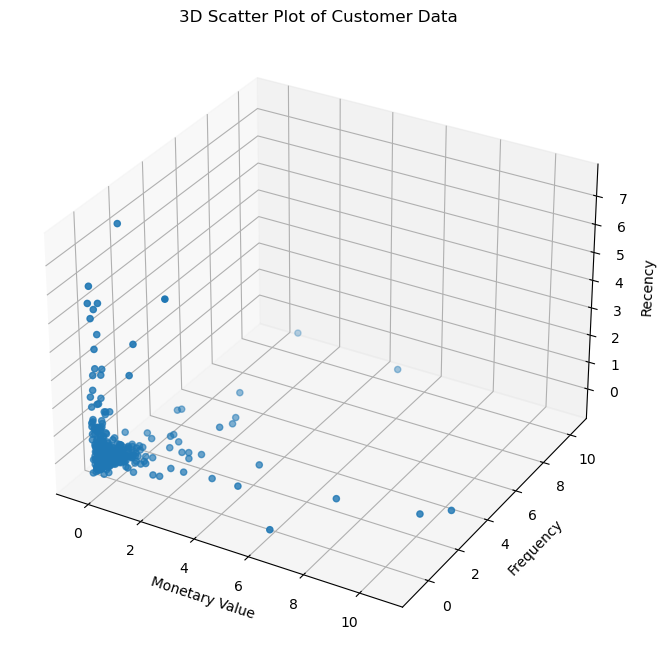

In [194]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(Outlier_scaled_data_df["MonetaryValue"], Outlier_scaled_data_df["Frequency"], Outlier_scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

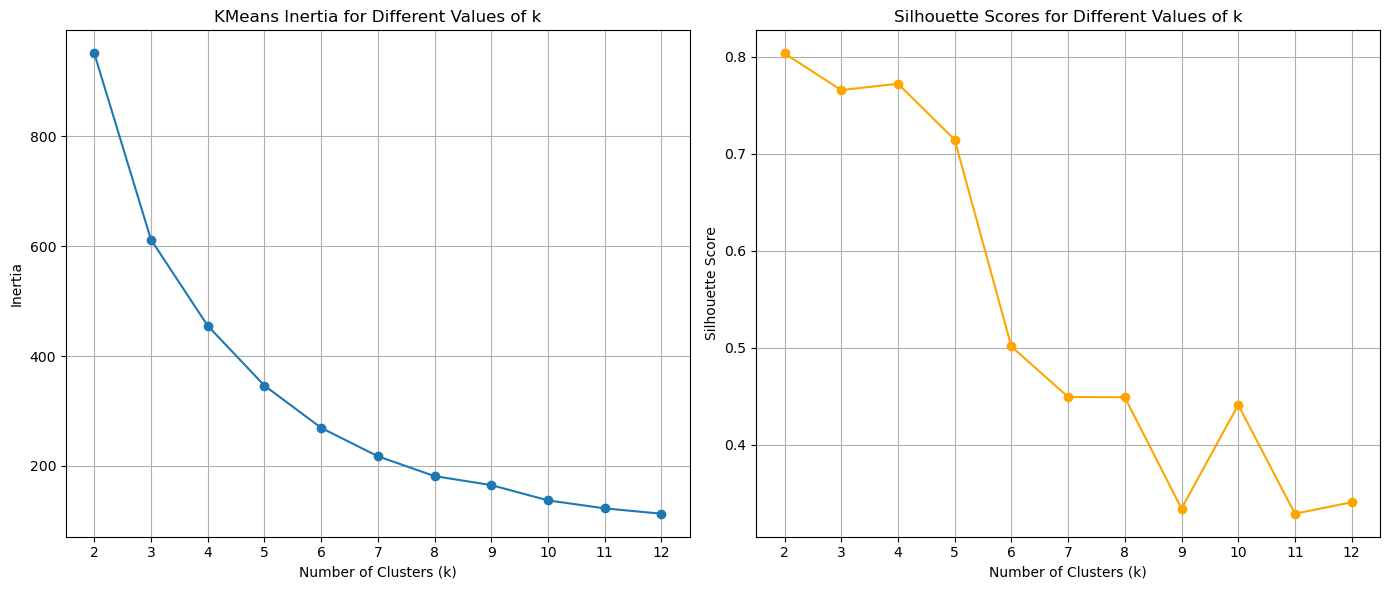

In [195]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels1 = kmeans.fit_predict(Outlier_scaled_data_df)

    sil_score = silhouette_score(Outlier_scaled_data_df, cluster_labels1)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [196]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels1 = kmeans.fit_predict(Outlier_scaled_data_df)

cluster_labels1 = cluster_labels1 + 4

In [197]:
outlier_df["Cluster"] = cluster_labels1

outlier_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,77183.60,1,2011-01-18 10:01:00,325,6
1,12347.00,4310.00,7,2011-12-07 15:52:00,1,4
10,12357.00,6207.67,1,2011-11-06 16:07:00,32,4
12,12359.00,6310.03,4,2011-10-13 12:47:00,57,4
15,12362.00,4737.23,10,2011-12-06 15:40:00,2,4
...,...,...,...,...,...,...
4101,17965.00,2599.19,14,2011-11-02 09:31:00,37,4
4168,18065.00,2392.83,14,2011-12-04 10:30:00,5,4
4227,18144.00,2888.75,12,2011-12-02 12:46:00,7,4
4303,18241.00,2073.09,17,2011-11-30 12:10:00,9,4


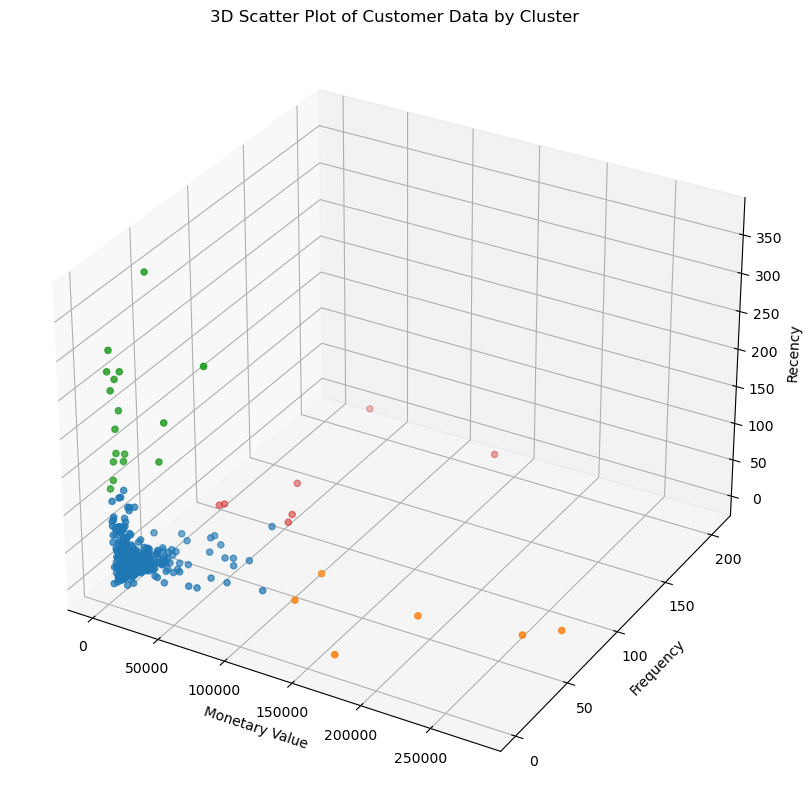

In [198]:
cluster_colors = {4: '#1f77b4',  # Blue
                  5: '#ff7f0e',  # Orange
                  6: '#2ca02c',  # Green
                  7: '#d62728'}  # Red

colors = outlier_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(outlier_df['MonetaryValue'], 
                     outlier_df['Frequency'], 
                     outlier_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

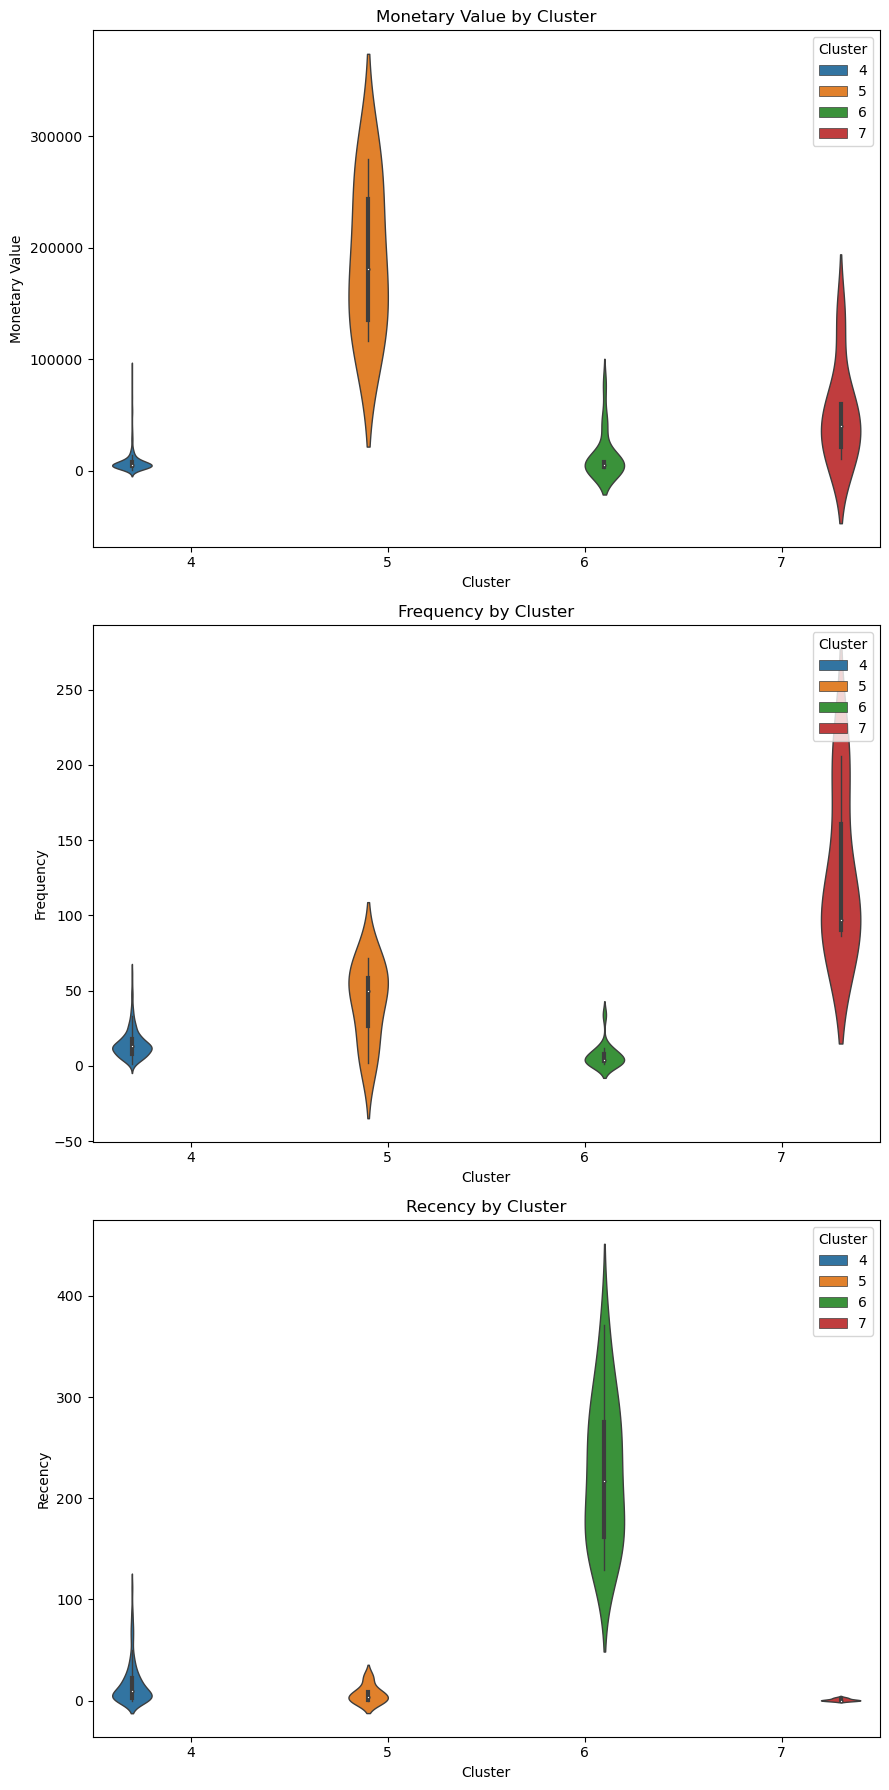

In [200]:
# Define the cluster colors, clusters 4, 5, 6, 7.
cluster_colors = {4: '#1f77b4',  # Blue
                  5: '#ff7f0e',  # Orange
                  6: '#2ca02c',  # Green
                  7: '#d62728'}  # Red

plt.figure(figsize=(9, 18))

# Monetary Value by Cluster
plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_df['Cluster'], y=outlier_df['MonetaryValue'], palette=cluster_colors, hue=outlier_df["Cluster"], linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

# Frequency by Cluster
plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_df['Cluster'], y=outlier_df['Frequency'], palette=cluster_colors, hue=outlier_df["Cluster"], linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

# Recency by Cluster
plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_df['Cluster'], y=outlier_df['Recency'], palette=cluster_colors, hue=outlier_df["Cluster"], linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

# Adjust layout
plt.tight_layout()
plt.show()

### 1. Cluster 4: **Regulars**
*Characteristics: Most are average spenders, frequent buyers, and recent purchasers.*

#### Marketing Strategies:
1. Offer tailored promotions or small loyalty rewards to reinforce their purchasing habits.
2. Focus on cross-sell and upsell opportunities by recommending complementary products.
3. Use personalized product suggestions based on their frequent buying patterns.

---

### 2. Cluster 5: **Elites**
*Characteristics: Extreme spenders, very frequent buyers, and very recent.*

#### Marketing Strategies:
1. Offer high-value perks like personalized consultations, premium experiences, or exclusive offers.
2. Provide early access to limited edition or high-end products to encourage continued engagement.
3. Build a strong sense of brand exclusivity through personalized services or direct communications.

---

### 3. Cluster 6: **Steadies**
*Characteristics: Low spend, high frequency, and not recent buyers.*

#### Marketing Strategies:
1. Keep engagement high by offering smaller, frequent promotions that match their spending habits.
2. Use subscription or loyalty programs that reward them for continued small purchases.
3. Offer regular updates on new products or trends to reignite their purchasing.

---

### 4. Cluster 7: **Dynamos**
*Characteristics: High spend, high frequency, and very recent buyers.*

#### Marketing Strategies:
1. Provide exclusive, time-limited offers or flash sales to match their high engagement and spending.
2. Introduce top-tier benefits, such as priority shipping or concierge services, to strengthen loyalty.
3. Nurture this relationship with personalized thank-you emails, gifts, or premium services.


In [201]:
cluster_labels = {
    0: "Actives",
    1: "Browsers",
    2: "Champions",
    3: "Inactives",
    4: "Regulars",
    5: "Elites",
    6: "Steadies",
    7: "Dynamos"
}


In [202]:
full_clustering_df = pd.concat([non_outliers_df, outlier_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12348.00,1437.24,4,2011-09-25 13:13:00,74,0
1,12349.00,1457.55,1,2011-11-21 09:51:00,18,1
2,12350.00,294.40,1,2011-02-02 16:01:00,309,3
3,12352.00,1385.74,7,2011-11-03 14:37:00,35,2
4,12353.00,89.00,1,2011-05-19 17:47:00,203,3
...,...,...,...,...,...,...
4101,17965.00,2599.19,14,2011-11-02 09:31:00,37,4
4168,18065.00,2392.83,14,2011-12-04 10:30:00,5,4
4227,18144.00,2888.75,12,2011-12-02 12:46:00,7,4
4303,18241.00,2073.09,17,2011-11-30 12:10:00,9,4


In [203]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12348.00,1437.24,4,2011-09-25 13:13:00,74,0,Actives
1,12349.00,1457.55,1,2011-11-21 09:51:00,18,1,Browsers
2,12350.00,294.40,1,2011-02-02 16:01:00,309,3,Inactives
3,12352.00,1385.74,7,2011-11-03 14:37:00,35,2,Champions
4,12353.00,89.00,1,2011-05-19 17:47:00,203,3,Inactives
...,...,...,...,...,...,...,...
4101,17965.00,2599.19,14,2011-11-02 09:31:00,37,4,Regulars
4168,18065.00,2392.83,14,2011-12-04 10:30:00,5,4,Regulars
4227,18144.00,2888.75,12,2011-12-02 12:46:00,7,4,Regulars
4303,18241.00,2073.09,17,2011-11-30 12:10:00,9,4,Regulars


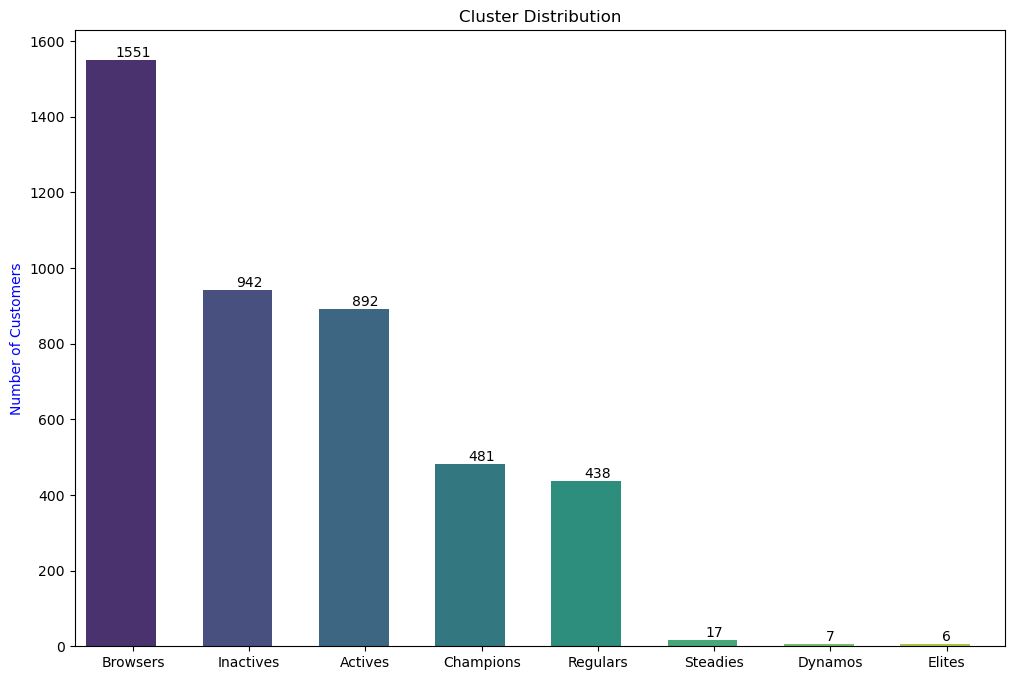

In [211]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Barplot 
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution')

# Add the count values at the top of each bar
for bar in ax1.patches:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,  
        height, 
        f'{int(height)}',  
        ha='center', va='bottom', fontsize=10  
    )

# Adjust the bar width
for bar in ax1.patches:
    bar.set_width(0.6)

